<a href="https://colab.research.google.com/github/NathanaelGracedo/PCVK_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **D-1 Percobaan Histogram**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

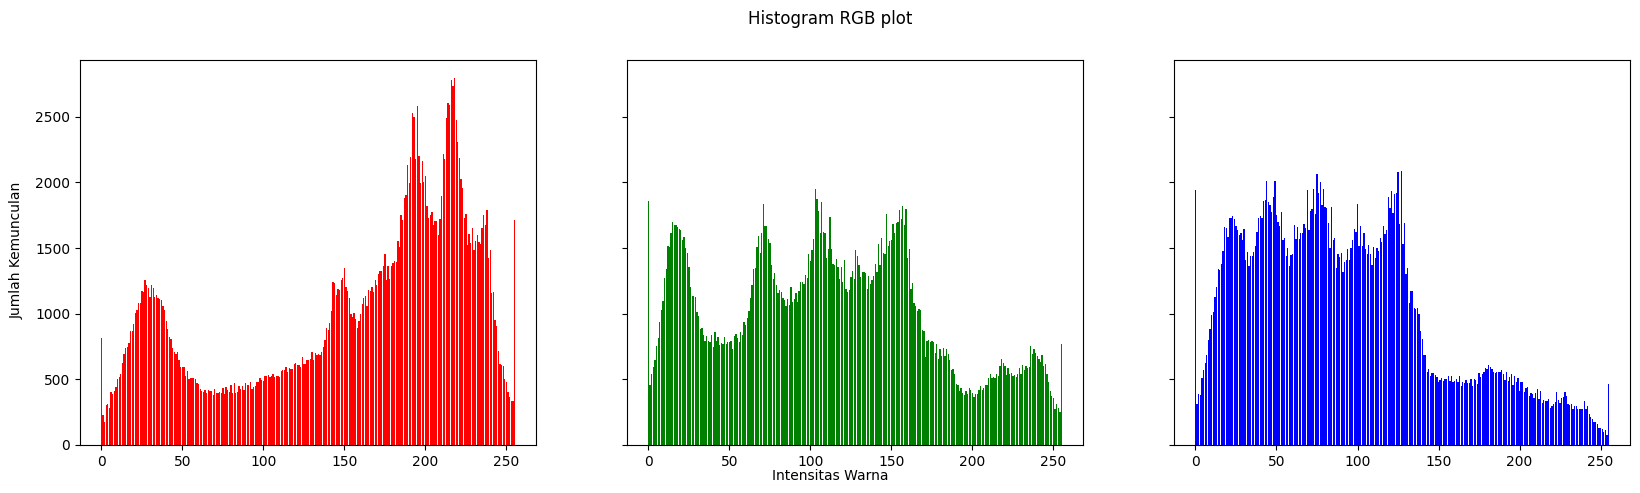

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height) :
  for x in range(0, width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1


names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

## **Pertanyaan Praktikum D1**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

<BarContainer object of 256 artists>

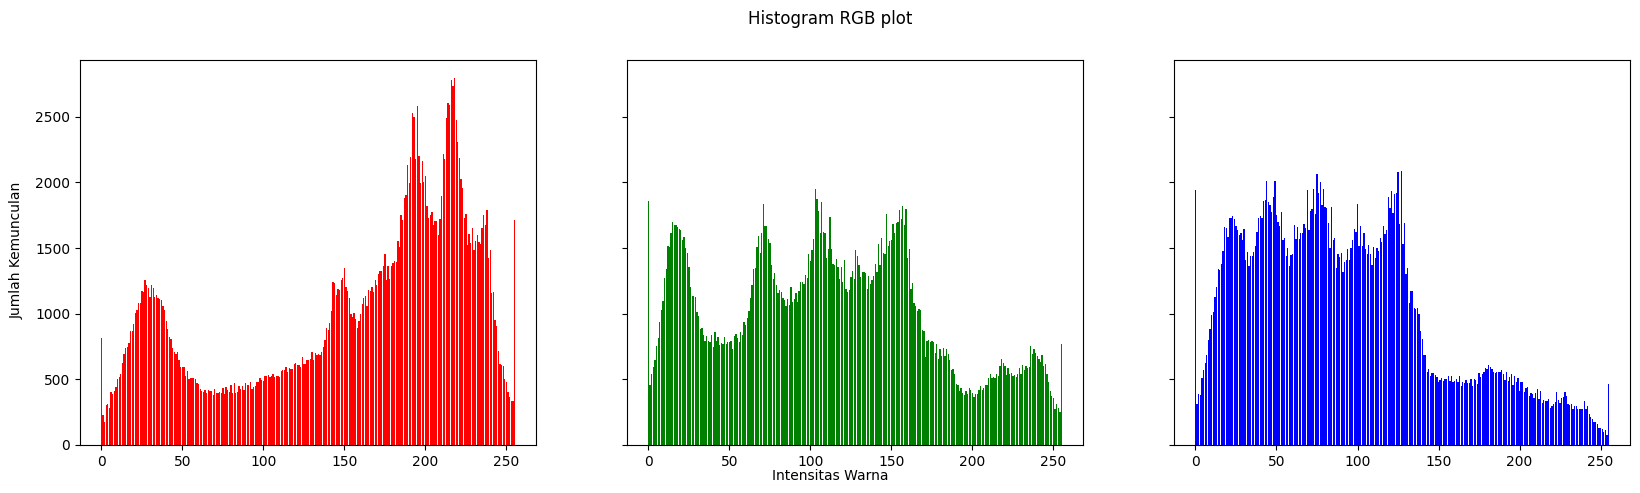

In [ ]:
img_np = img.copy()

red, _ = np.histogram(img_np[:, :, 0], bins=256, range=[0, 256])
green, _ = np.histogram(img_np[:, :, 1], bins=256, range=[0, 256])
blue, _ = np.histogram(img_np[:, :, 2], bins=256, range=[0, 256])

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

**Kesimpulan**: Ya, output yang muncul sama

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.

<BarContainer object of 256 artists>

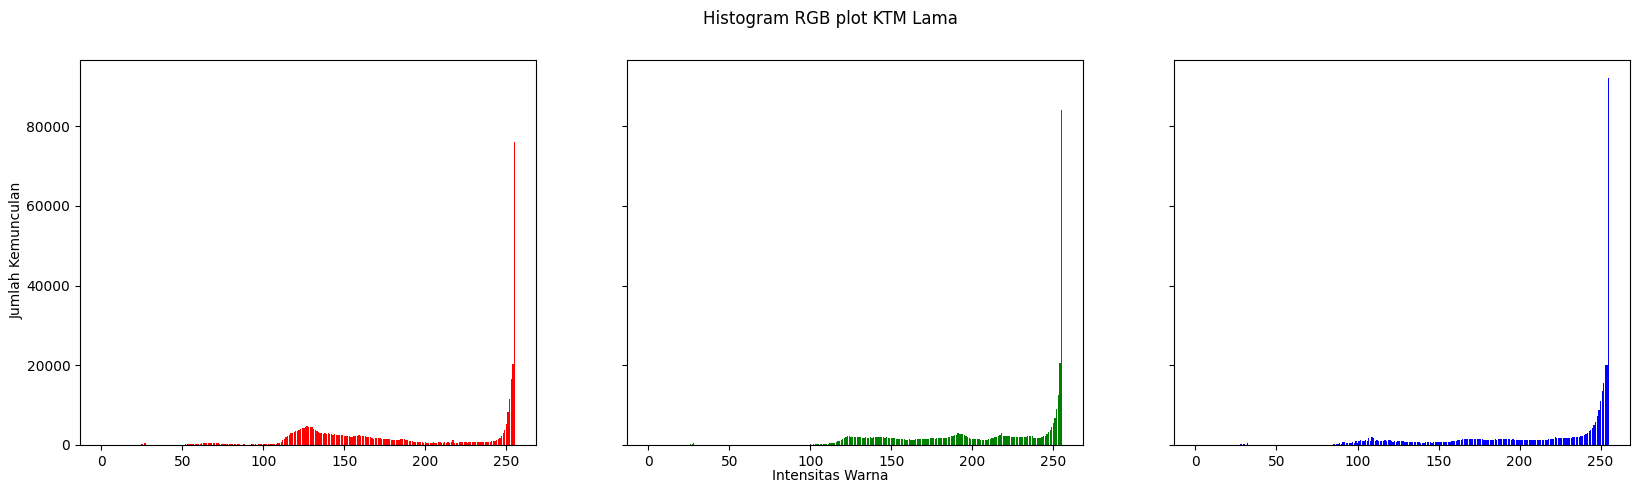

In [9]:
ktm_lama = cv.imread('/content/drive/MyDrive/PCVK_img/KTM lama.jpg')
ktm_lama = cv.cvtColor(ktm_lama, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(ktm_lama)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height) :
  for x in range(0, width) :
    red[ktm_lama[y][x][0]] += 1
    green[ktm_lama[y][x][1]] += 1
    blue[ktm_lama[y][x][2]] += 1


names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot KTM Lama')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

**Penjelasan**
*   **Histogram Red**: Distribusi intensitas cenderung terkonsentrasi di sisi kanan.  Ini menunjukkan bahwa gambar memiliki banyak piksel dengan intensitas merah yang terang.

*   **Histogram Green**: Distribusi intensitas juga sangat terkonsentrasi di sisi kanan, dengan puncak yang sangat tajam di sekitar nilai 255. Ini memperlihatkan bahwa warna hijau mendominasi dengan tingkat kecerahan yang maksimal.

* **Histogram Blue**: Mirip dengan dua saluran lainnya, intensitas warna biru juga banyak terpusat pada nilai-nilai tinggi, yang menandakan keberadaan piksel biru yang sangat terang dalam gambar.

**Kesimpulan**
Gambar KTM Lama memiliki karakteristik yang terang.

Alasannya, distribusi piksel pada ketiga saluran warna merah, hijau, dan biru mayoritas berada pada nilai intensitas yang tinggi. Nilai yang mendekati 255 menunjukkan warna yang sangat terang, sehingga konsentrasi data di area ini menjadi penanda utama kecerahan gambar.





## **D-2 Percobaan Histogram Equalitation**

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

/tmp/ipython-input-167035928.py:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.flatten(), 256, [0, 256], color='red')
/tmp/ipython-input-167035928.py:60: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.flatten(), 256, [0, 256], color='green')
/tmp/ipython-input-167035928.py:66: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.flatten(), 256, [0, 256], color='blue')
/tmp/ipython-input-167035928.py:80: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r_eq.flatten(), 256, [0, 2

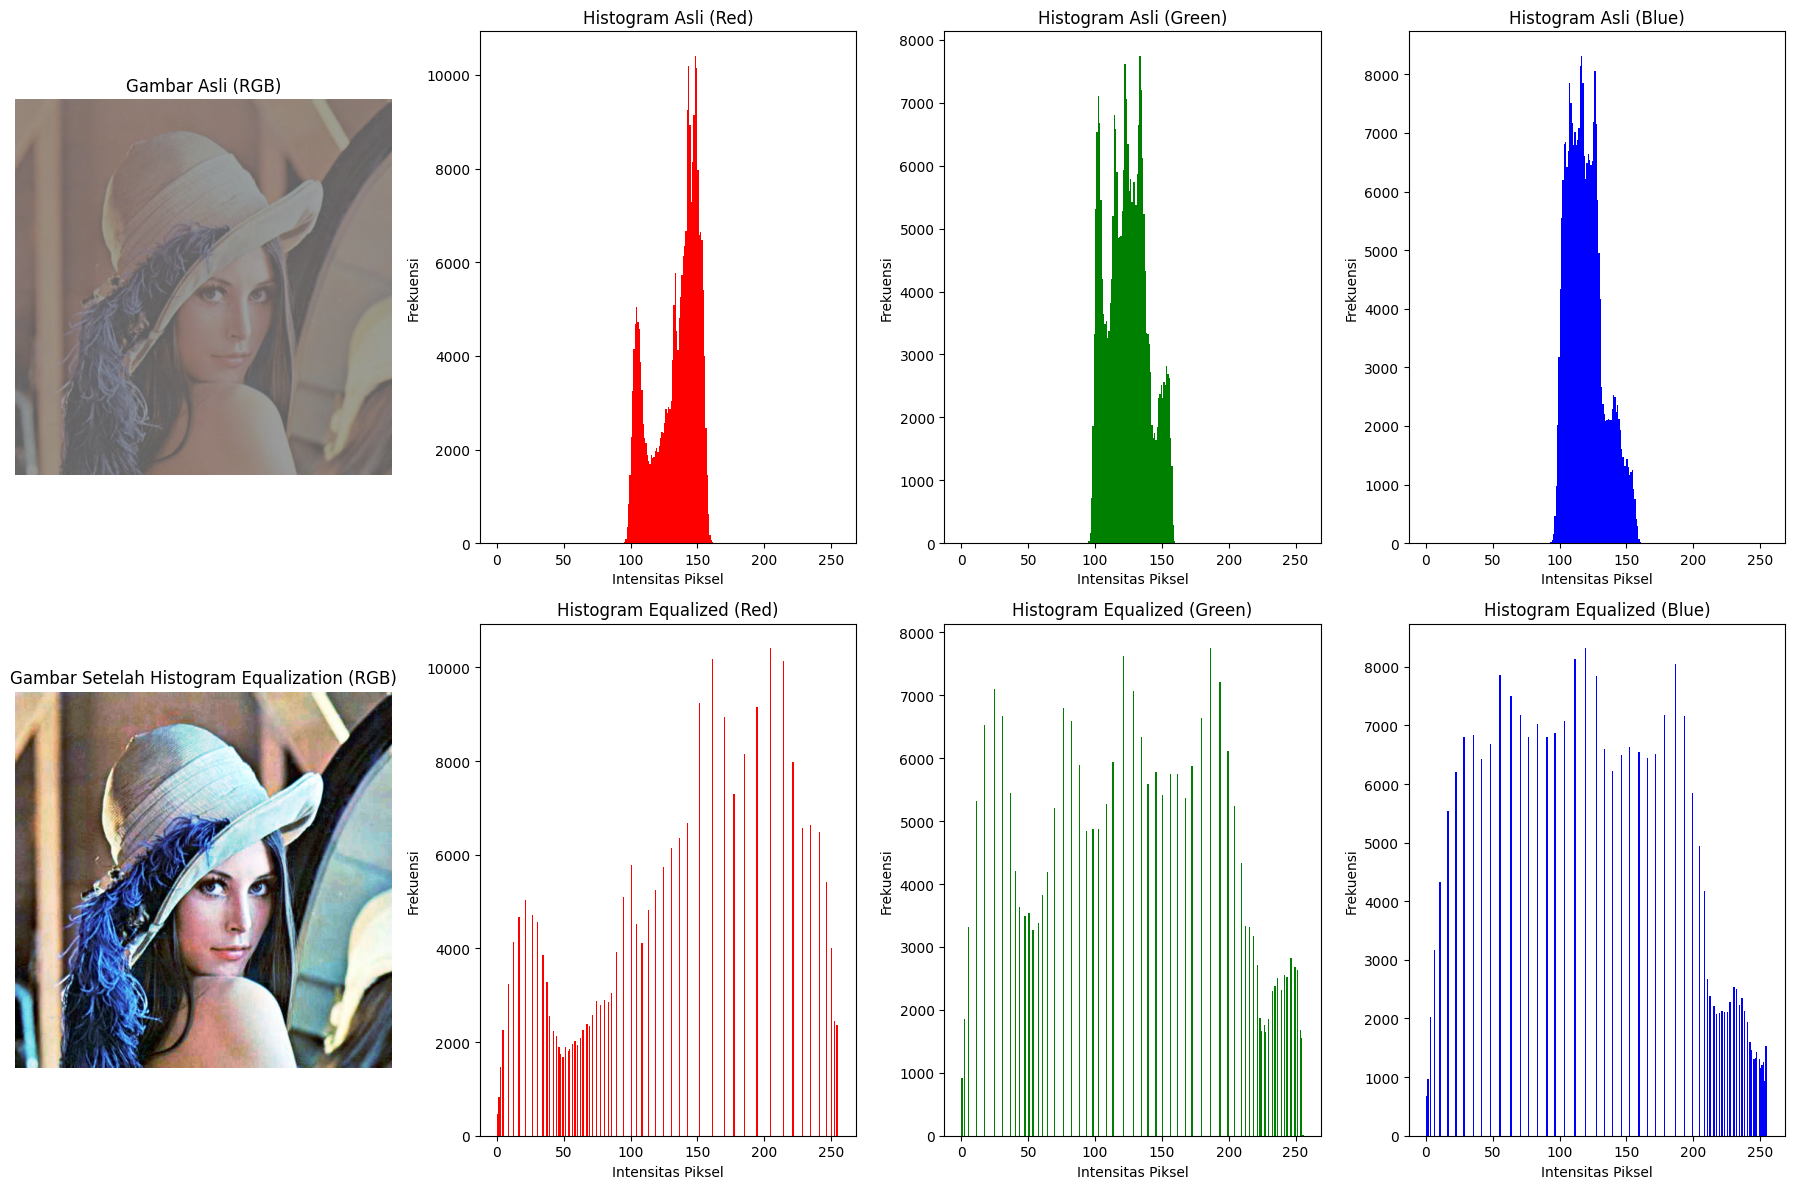

In [ ]:
img_lena_lc = cv.imread('/content/drive/MyDrive/PCVK_img/lena_lc.jpg')

# Memeriksa apakah gambar berhasil dimuat
if img_lena_lc is None:
    print("Error: Tidak dapat memuat gambar. Harap periksa path file.")
else:
    img_bgr = img_lena_lc
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    b, g, r = cv.split(img_bgr)

    # Fungsi Equalisasi Histogram Manual
    def manual_equalize_hist(channel):
        # Hitung histogram
        hist, bins = np.histogram(channel.flatten(), 256, [0, 256])

        # Hitung fungsi distribusi kumulatif (CDF)
        cdf = hist.cumsum()

        # Normalisasi CDF
        cdf_normalized = cdf * hist.max() / cdf.max()

        # Buat pemetaan dari intensitas lama ke intensitas baru
        # Atasi potensi pembagian dengan nol jika cdf_min adalah nol
        cdf_m = np.ma.masked_equal(cdf, 0)
        cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
        cdf = np.ma.filled(cdf_m, 0).astype('uint8')

        # Terapkan pemetaan ke saluran
        img_eq = cdf[channel]
        return img_eq

    # Terapkan equalisasi histogram manual ke setiap saluran
    r_eq = manual_equalize_hist(r)
    g_eq = manual_equalize_hist(g)
    b_eq = manual_equalize_hist(b)

    # Gabungkan kembali saluran yang sudah diekualisasi menjadi gambar RGB
    img_eq_bgr = cv.merge((b_eq, g_eq, r_eq))
    img_eq_rgb = cv.cvtColor(img_eq_bgr, cv.COLOR_BGR2RGB)


    # Tampilan gambar asli (RGB)
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Gambar Asli (RGB)')
    plt.axis('off')

    # Histogram saluran RGB asli (terpisah)
    plt.subplot(2, 4, 2)
    plt.hist(r.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Asli (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 3)
    plt.hist(g.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Asli (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 4)
    plt.hist(b.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Asli (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    # Tampilan gambar setelah equalisasi histogram (RGB)
    plt.subplot(2, 4, 5)
    plt.imshow(img_eq_rgb)
    plt.title('Gambar Setelah Equalisasi Histogram (RGB)')
    plt.axis('off')

    # Histogram saluran RGB yang sudah diekualisasi (terpisah)
    plt.subplot(2, 4, 6)
    plt.hist(r_eq.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Setelah Equalization (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 7)
    plt.hist(g_eq.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Setelah Equalization (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 8)
    plt.hist(b_eq.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Setelah Equalization (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    plt.tight_layout()
    plt.show()

2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada potongan kode berikut ini.

/tmp/ipython-input-1537365324.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.flatten(), 256, [0, 256], color='red')
/tmp/ipython-input-1537365324.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.flatten(), 256, [0, 256], color='green')
/tmp/ipython-input-1537365324.py:44: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.flatten(), 256, [0, 256], color='blue')
/tmp/ipython-input-1537365324.py:58: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r_eq.flatten(), 256, [

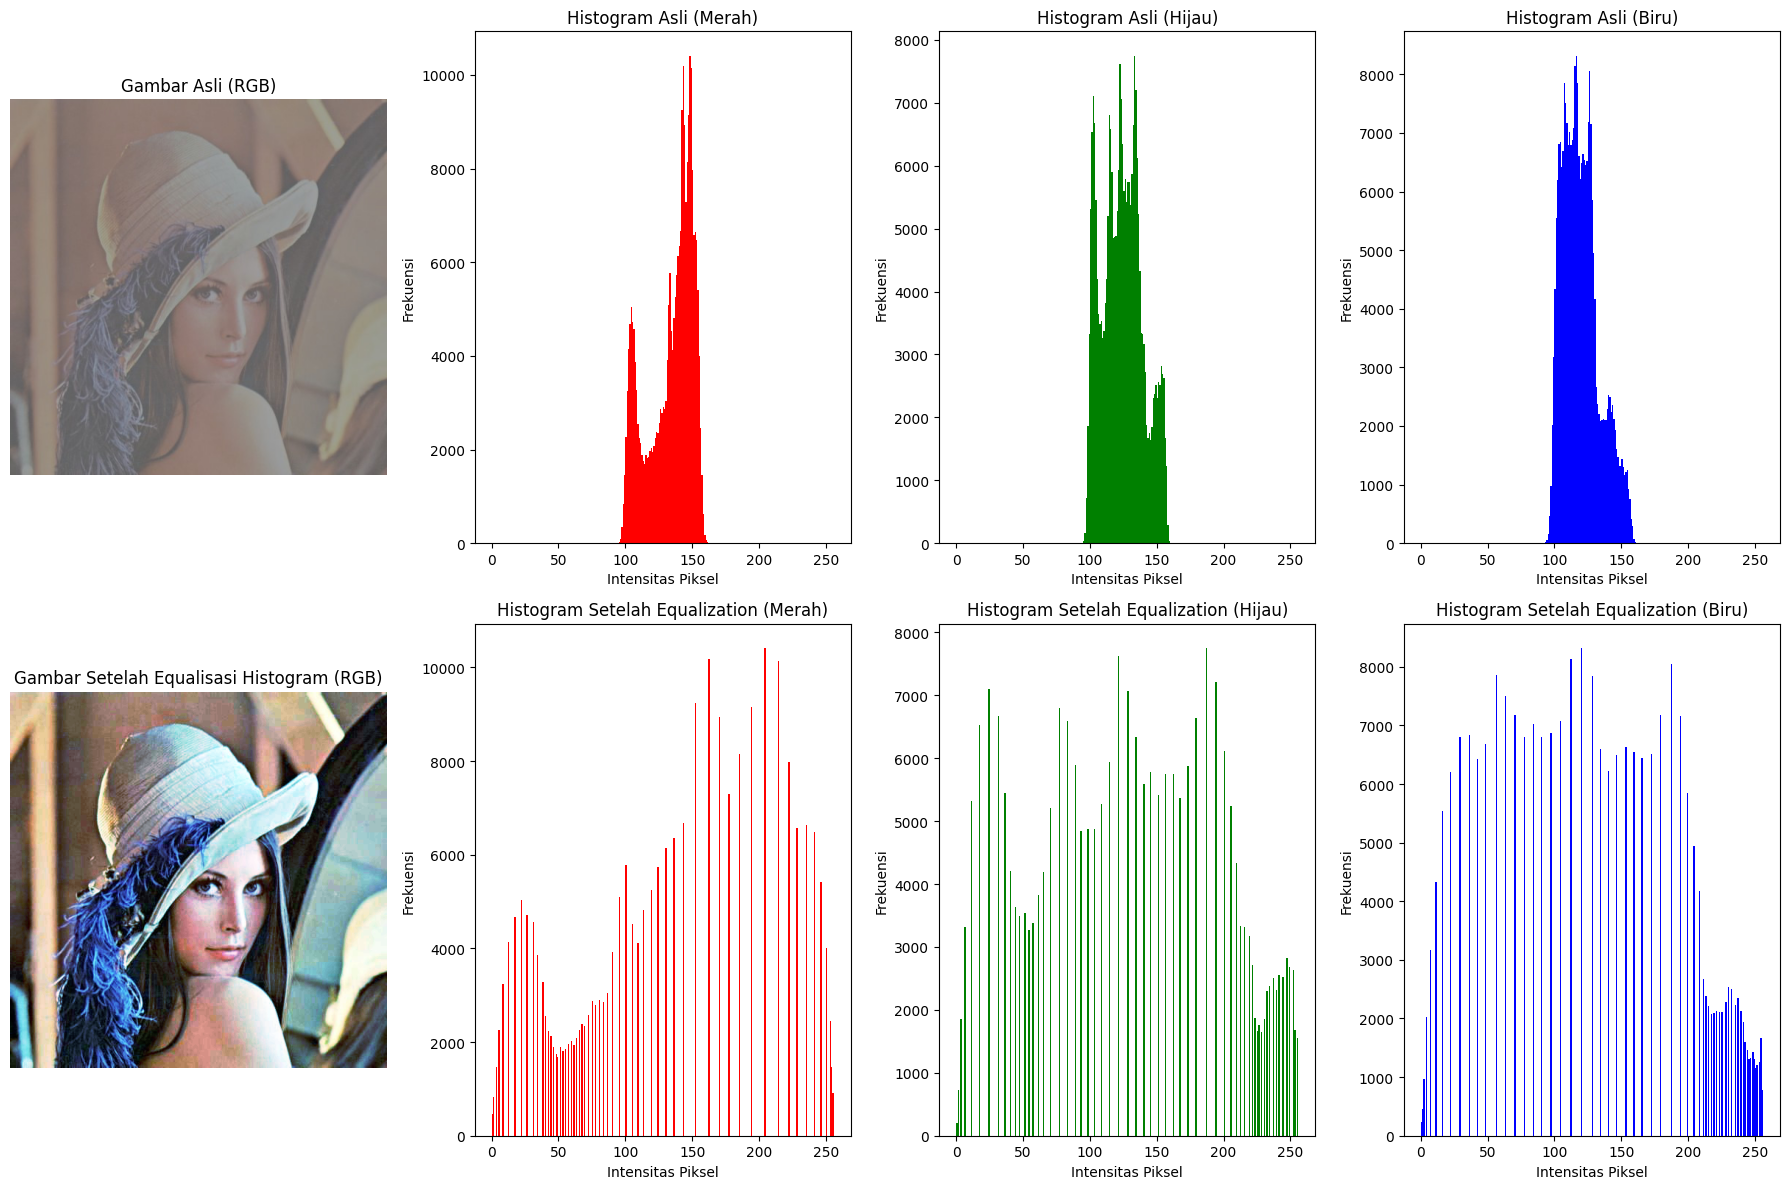

In [10]:
img_lena_lc = cv.imread('/content/drive/MyDrive/PCVK_img/lena_lc.jpg')

# Memeriksa apakah gambar berhasil dimuat
if img_lena_lc is None:
    print("Error: Tidak dapat memuat gambar. Harap periksa path file.")
else:
    img_bgr = img_lena_lc
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    b, g, r = cv.split(img_bgr)

    # Gunakan cv2.equalizeHist untuk setiap saluran warna
    r_eq = cv.equalizeHist(r)
    g_eq = cv.equalizeHist(g)
    b_eq = cv.equalizeHist(b)

    # Gabungkan kembali saluran yang sudah diekualisasi menjadi gambar RGB
    img_eq_bgr = cv.merge((b_eq, g_eq, r_eq))
    img_eq_rgb = cv.cvtColor(img_eq_bgr, cv.COLOR_BGR2RGB)


    # Tampilan gambar asli (RGB)
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Gambar Asli (RGB)')
    plt.axis('off')

    # Histogram saluran RGB asli (terpisah)
    plt.subplot(2, 4, 2)
    plt.hist(r.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Asli (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 3)
    plt.hist(g.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Asli (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 4)
    plt.hist(b.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Asli (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    # Tampilan gambar setelah equalisasi histogram (RGB)
    plt.subplot(2, 4, 5)
    plt.imshow(img_eq_rgb)
    plt.title('Gambar Setelah Equalisasi Histogram (RGB)')
    plt.axis('off')

    # Histogram saluran RGB yang sudah diekualisasi (terpisah)
    plt.subplot(2, 4, 6)
    plt.hist(r_eq.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Setelah Equalization (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 7)
    plt.hist(g_eq.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Setelah Equalization (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 8)
    plt.hist(b_eq.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Setelah Equalization (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    plt.tight_layout()
    plt.show()

**Kesimpulan:** Ya output yang muncul sama

##

## **Pertanyaan Praktikum D2**

1. **Perbandingan Citra Lena**

a. Gunakan hasil histogram equalization pada citra lena.jpg.

/tmp/ipython-input-467331341.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.flatten(), 256, [0, 256], color='red')
/tmp/ipython-input-467331341.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.flatten(), 256, [0, 256], color='green')
/tmp/ipython-input-467331341.py:44: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.flatten(), 256, [0, 256], color='blue')
/tmp/ipython-input-467331341.py:58: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r_eq.flatten(), 256, [0, 2

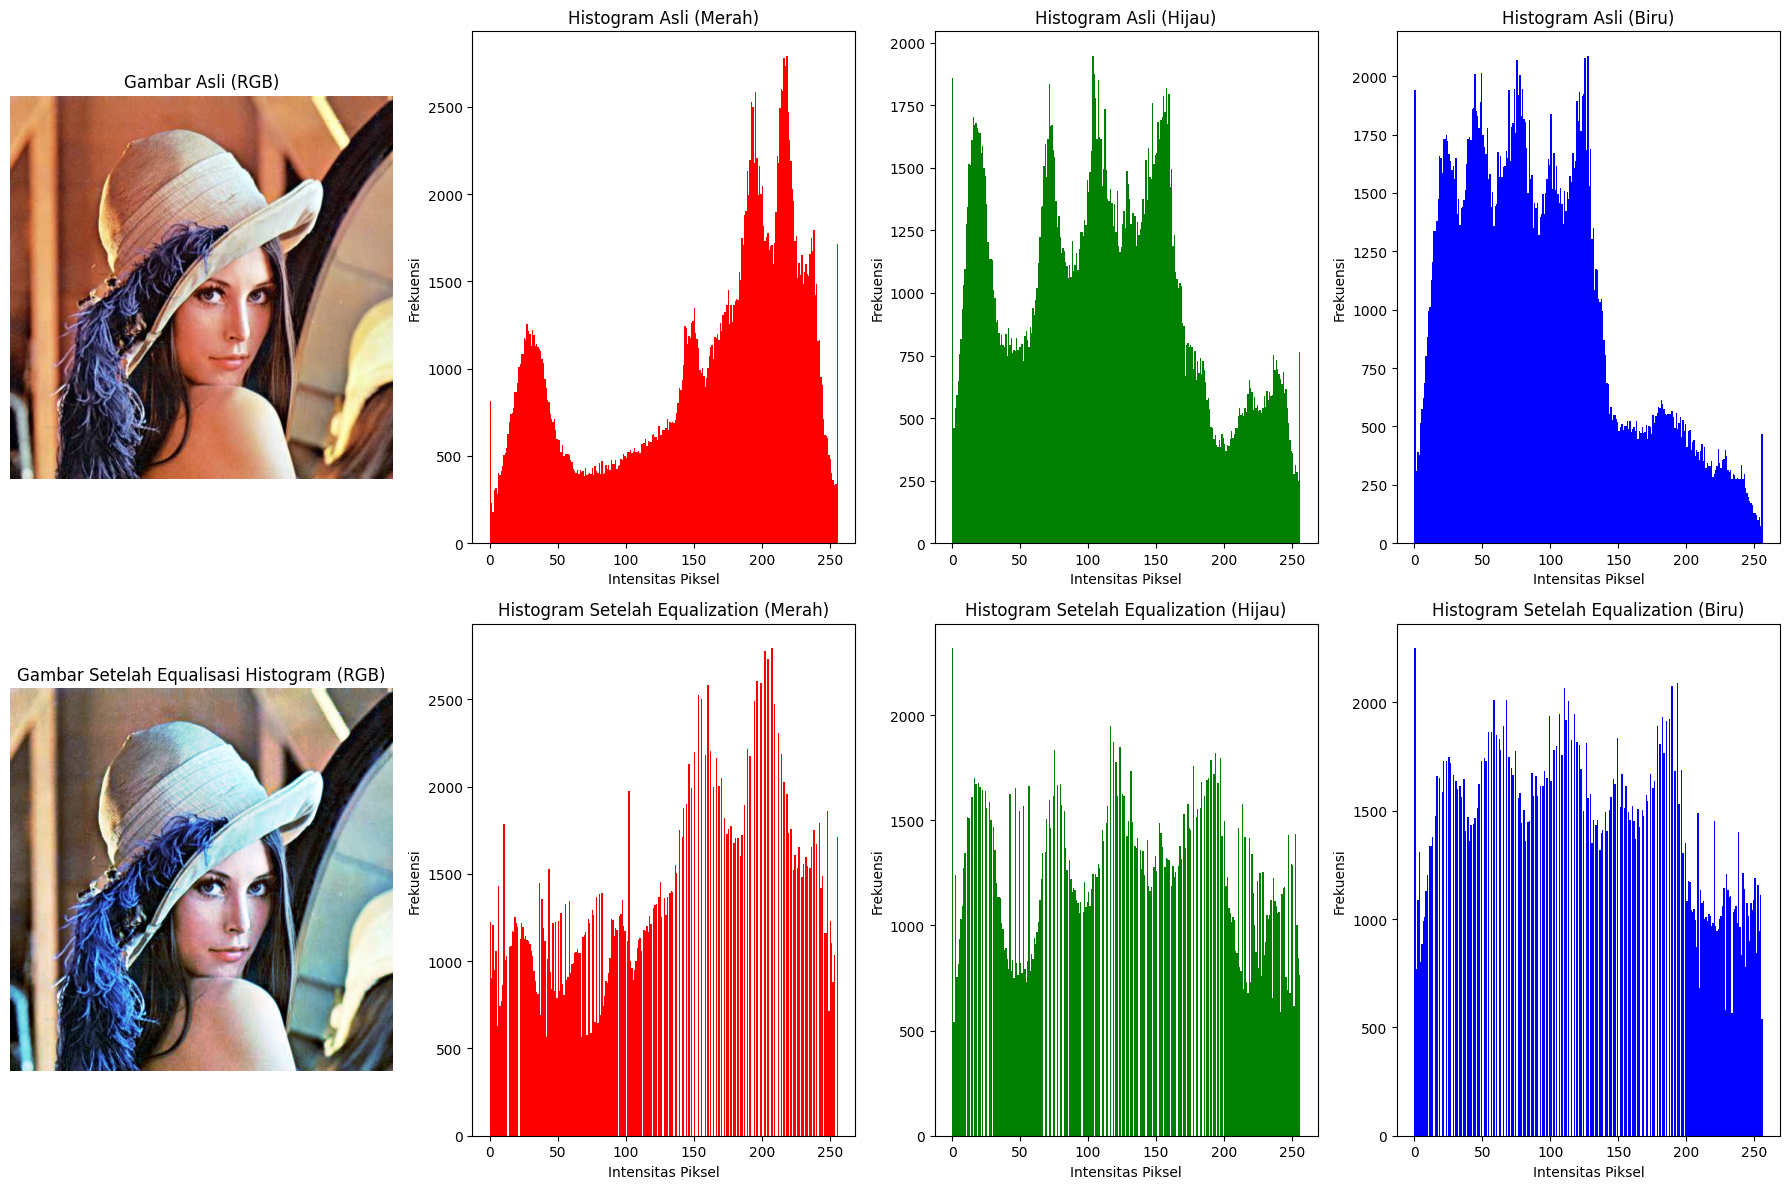

In [ ]:
img_lena_lc = cv.imread('/content/drive/MyDrive/PCVK_img/lena.jpg')

# Memeriksa apakah gambar berhasil dimuatA
if img_lena_lc is None:
    print("Error: Tidak dapat memuat gambar. Harap periksa path file.")
else:
    img_bgr = img_lena_lc
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    b, g, r = cv.split(img_bgr)

    # Gunakan cv2.equalizeHist untuk setiap saluran warna
    r_eq = cv.equalizeHist(r)
    g_eq = cv.equalizeHist(g)
    b_eq = cv.equalizeHist(b)

    # Gabungkan kembali saluran yang sudah diekualisasi menjadi gambar RGB
    img_eq_bgr = cv.merge((b_eq, g_eq, r_eq))
    img_eq_rgb = cv.cvtColor(img_eq_bgr, cv.COLOR_BGR2RGB)


    # Tampilan gambar asli (RGB)
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Gambar Asli (RGB)')
    plt.axis('off')

    # Histogram saluran RGB asli (terpisah)
    plt.subplot(2, 4, 2)
    plt.hist(r.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Asli (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 3)
    plt.hist(g.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Asli (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 4)
    plt.hist(b.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Asli (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    # Tampilan gambar setelah equalisasi histogram (RGB)
    plt.subplot(2, 4, 5)
    plt.imshow(img_eq_rgb)
    plt.title('Gambar Setelah Equalisasi Histogram (RGB)')
    plt.axis('off')

    # Histogram saluran RGB yang sudah diekualisasi (terpisah)
    plt.subplot(2, 4, 6)
    plt.hist(r_eq.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Setelah Equalization (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 7)
    plt.hist(g_eq.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Setelah Equalization (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 8)
    plt.hist(b_eq.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Setelah Equalization (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    plt.tight_layout()
    plt.show()

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

In [ ]:
# Hitung Mean Squared Error (MSE)
mse = np.mean((img_rgb - img_eq_rgb) ** 2)

# Jika MSE adalah 0, PSNR tidak terdefinisi
if mse == 0:
    psnr = float('inf')
else:
    # Hitung PSNR
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

print(f"Nilai PSNR antara citra asli dan citra hasil equalisasi: {psnr:.2f} dB")

Nilai PSNR antara citra asli dan citra hasil equalisasi: 28.46 dB


c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

**Jawab**: Nilai PSNR tinggi, nilai PSNR 28.46 dB menunjukkan equalisasi histogram mengubah citra asli, detail yang ditambahkan adanya peningkatan kontras dan visibaitas detail.

2. **Gunakan citra KTM LAMA.JPG**

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.

/tmp/ipython-input-4200630464.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r.flatten(), 256, [0, 256], color='red')
/tmp/ipython-input-4200630464.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(g.flatten(), 256, [0, 256], color='green')
/tmp/ipython-input-4200630464.py:44: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(b.flatten(), 256, [0, 256], color='blue')
/tmp/ipython-input-4200630464.py:58: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(r_eq.flatten(), 256, [

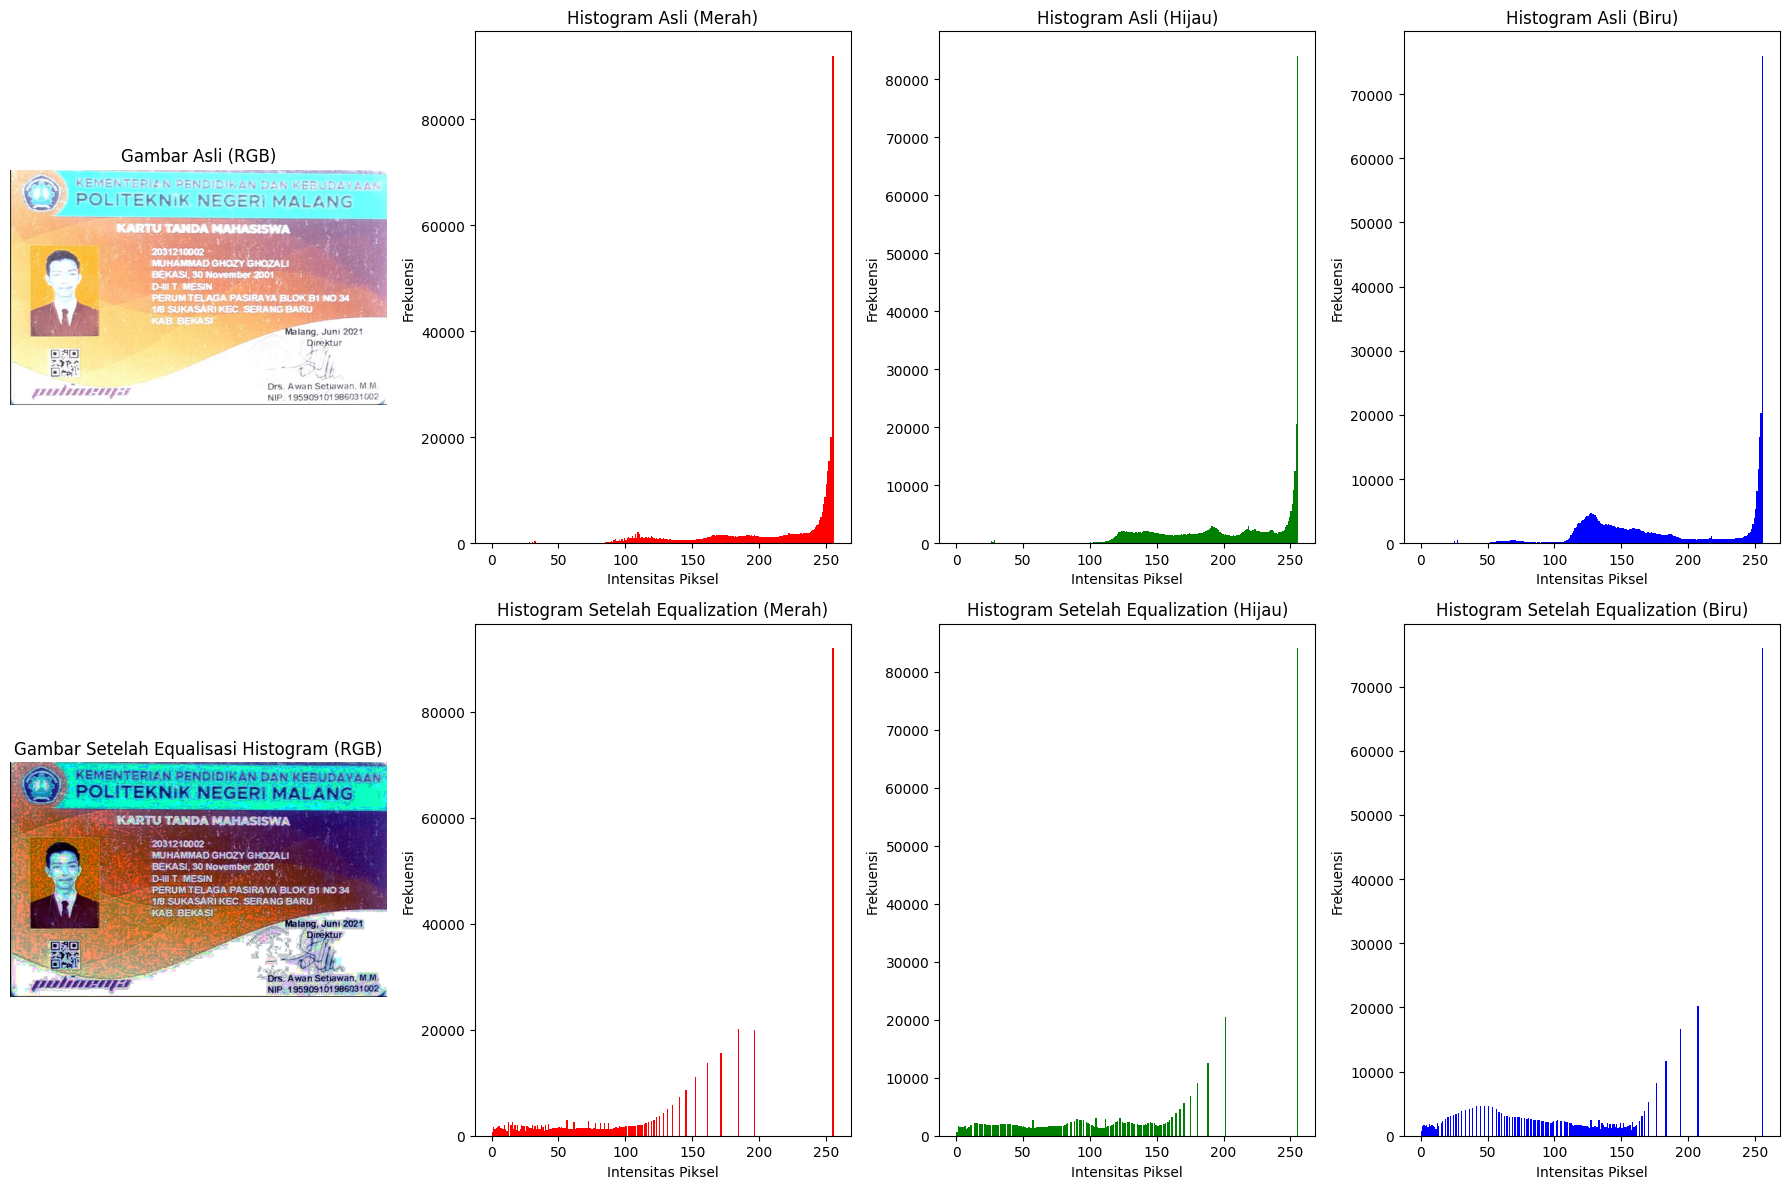

In [11]:
ktm_lama_copy = ktm_lama.copy()

# Memeriksa apakah gambar berhasil dimuatA
if ktm_lama is None:
    print("Error: Tidak dapat memuat gambar. Harap periksa path file.")
else:
    img_bgr = ktm_lama_copy
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    b, g, r = cv.split(img_bgr)

    # Gunakan cv2.equalizeHist untuk setiap saluran warna
    r_eq = cv.equalizeHist(r)
    g_eq = cv.equalizeHist(g)
    b_eq = cv.equalizeHist(b)

    # Gabungkan kembali saluran yang sudah diekualisasi menjadi gambar RGB
    img_eq_bgr = cv.merge((b_eq, g_eq, r_eq))
    img_eq_rgb = cv.cvtColor(img_eq_bgr, cv.COLOR_BGR2RGB)


    # Tampilan gambar asli (RGB)
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Gambar Asli (RGB)')
    plt.axis('off')

    # Histogram saluran RGB asli (terpisah)
    plt.subplot(2, 4, 2)
    plt.hist(r.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Asli (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 3)
    plt.hist(g.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Asli (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 4)
    plt.hist(b.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Asli (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    # Tampilan gambar setelah equalisasi histogram (RGB)
    plt.subplot(2, 4, 5)
    plt.imshow(img_eq_rgb)
    plt.title('Gambar Setelah Equalisasi Histogram (RGB)')
    plt.axis('off')

    # Histogram saluran RGB yang sudah diekualisasi (terpisah)
    plt.subplot(2, 4, 6)
    plt.hist(r_eq.flatten(), 256, [0, 256], color='red')
    plt.title('Histogram Setelah Equalization (Merah)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 7)
    plt.hist(g_eq.flatten(), 256, [0, 256], color='green')
    plt.title('Histogram Setelah Equalization (Hijau)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')

    plt.subplot(2, 4, 8)
    plt.hist(b_eq.flatten(), 256, [0, 256], color='blue')
    plt.title('Histogram Setelah Equalization (Biru)')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Frekuensi')


    plt.tight_layout()
    plt.show()

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

Jawab:

Perubahan yang terjadi setelah histogram equalization pada citra KTM lama.jpg meningkatkan kualitas informasi dari citra. Dengan meningkatkan kontras dan mendistribusikan intensitas piksel secara lebih merata, detail yang sebelumnya sulit dilihat menjadi lebih jelas.

Secara keseluruhan, untuk citra KTM lama.jpg, histogram equalization berhasil meningkatkan visibilitas detail wajah, teks, dan latar belakang, sehingga meningkatkan kualitas informasi yang terkandung dalam citra.



## **D-3 Tugas Praktikum DITHERING**

1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

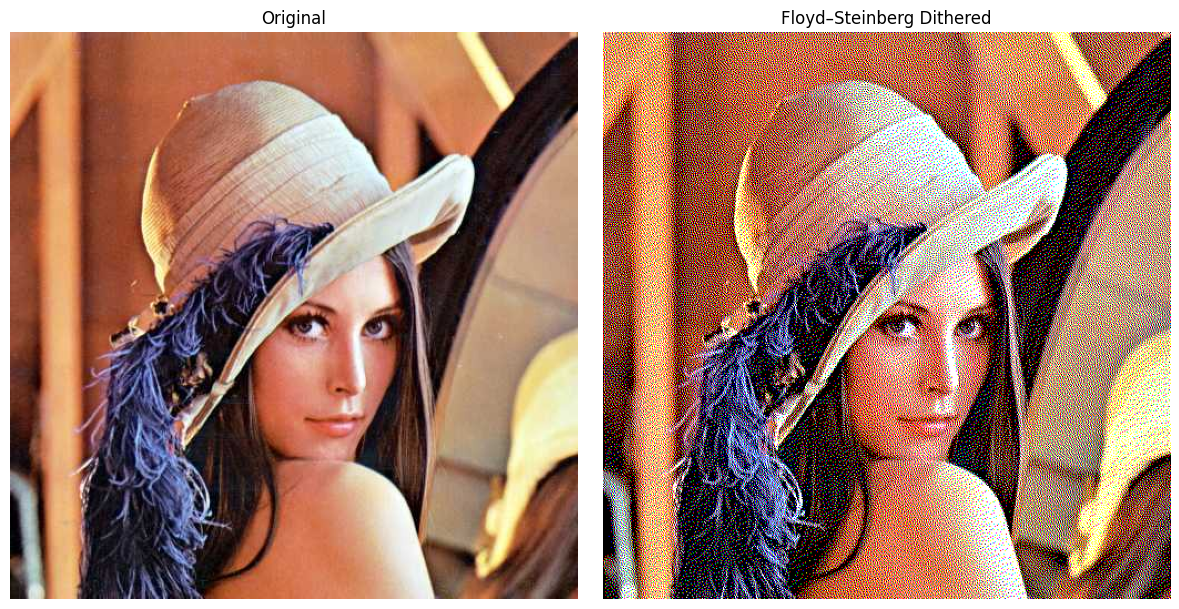

In [13]:
paths_to_try = [
    '/content/drive/MyDrive/PCVK_img/lena.jpg',  # user-specified
    '/mnt/data/d22d1e48-59d5-4451-88e9-59a9980f8a92.png',
    '/mnt/data/45590582-4408-43bd-a4bd-ecbf31631e9b.png',
    '/mnt/data/lena.png',
    '/mnt/data/lena.jpg'
]

img = None
used_path = None
for p in paths_to_try:
    if os.path.exists(p):
        tmp = cv.imread(p, cv.IMREAD_COLOR)
        if tmp is not None:
            img = tmp
            used_path = p
            break

if img is None:
    raise FileNotFoundError("Gagal menemukan file 'lena.jpg' pada path yang dicoba. "
                            "Paths tried:\n" + "\n".join(paths_to_try))

# Convert to float for error diffusion calculations
img_float = img.astype(np.float32)

h, w, ch = img_float.shape

# Floyd–Steinberg dithering per channel with threshold 128
for y in range(h):
    for x in range(w):
        for c in range(ch):
            old = img_float[y, x, c]
            new = 255.0 if old > 127.5 else 0.0
            img_float[y, x, c] = new
            err = old - new
            if x + 1 < w:
                img_float[y, x + 1, c] += err * 7.0 / 16.0
            if y + 1 < h:
                if x - 1 >= 0:
                    img_float[y + 1, x - 1, c] += err * 3.0 / 16.0
                img_float[y + 1, x, c] += err * 5.0 / 16.0
                if x + 1 < w:
                    img_float[y + 1, x + 1, c] += err * 1.0 / 16.0

# Clip and convert back to uint8
dithered = np.clip(img_float, 0, 255).astype(np.uint8)

# Convert BGR->RGB for matplotlib display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dithered_rgb = cv.cvtColor(dithered, cv.COLOR_BGR2RGB)

# Show original and dithered side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(dithered_rgb)
axes[1].set_title('Floyd–Steinberg Dithered')
axes[1].axis('off')

plt.tight_layout()
plt.show()


2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

File yang digunakan: /content/drive/MyDrive/PCVK_img/lena.jpg
Grayscale dtype: uint8 min: 0 max: 255


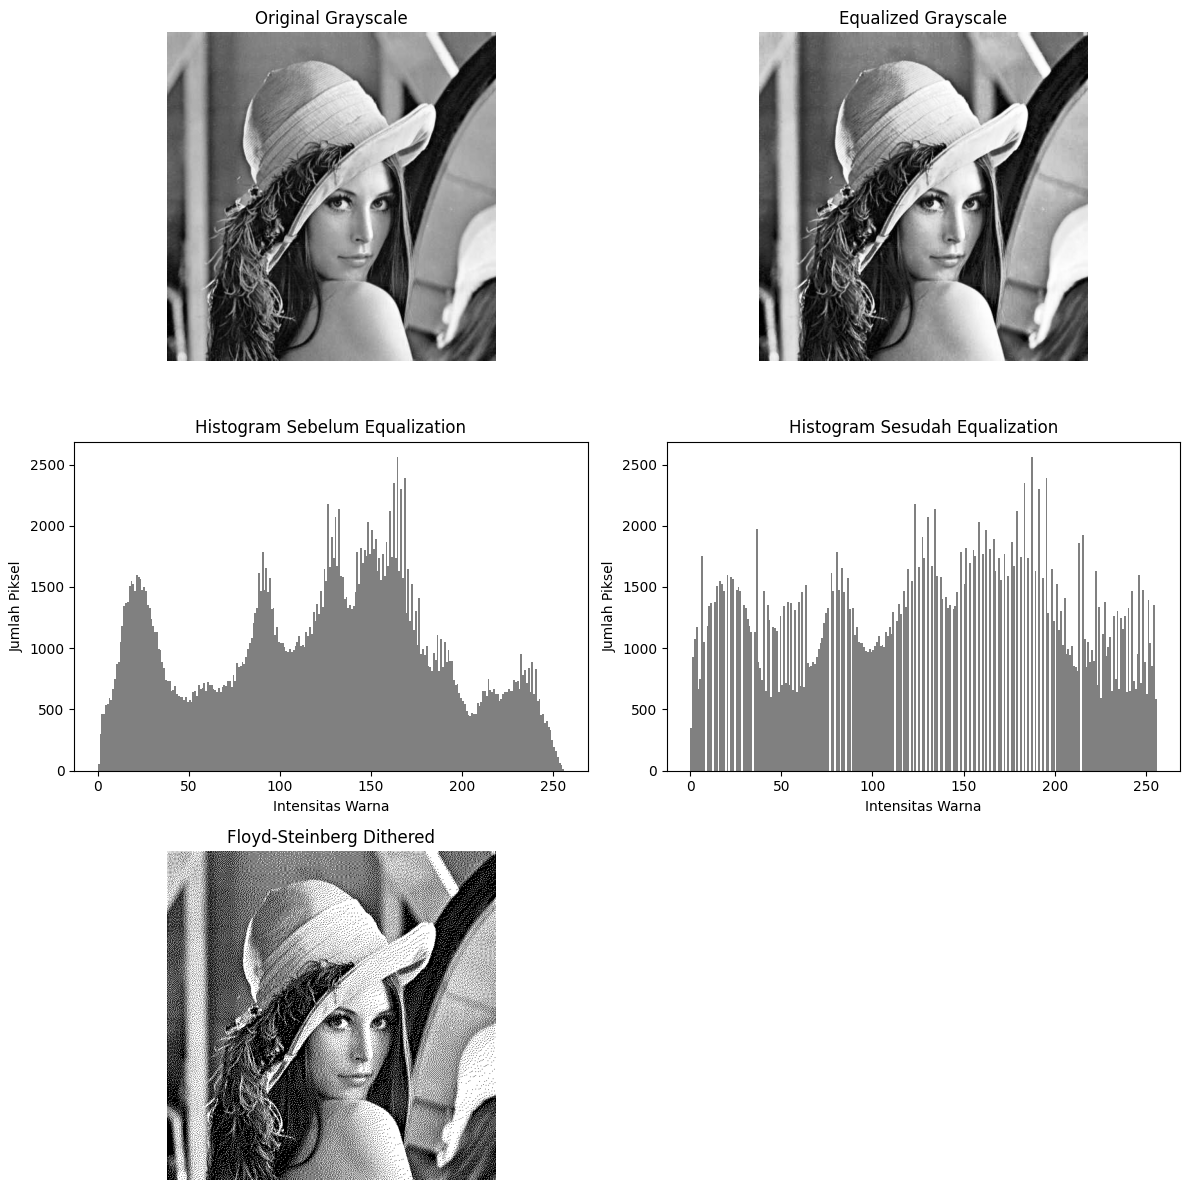

In [16]:
# Step 1: Cek file path
paths_to_try = [
    '/content/drive/MyDrive/PCVK_img/lena.jpg',
    '/mnt/data/d360716d-937e-4a61-a2bd-aae94db0ec2b.png',
    '/mnt/data/d22d1e48-59d5-4451-88e9-59a9980f8a92.png'
]

img = None
used_path = None
for p in paths_to_try:
    if os.path.exists(p):
        tmp = cv.imread(p, cv.IMREAD_COLOR)
        if tmp is not None:
            img = tmp
            used_path = p
            break

if img is None:
    raise FileNotFoundError("Gagal menemukan file Lena pada path yang tersedia.")

print("File yang digunakan:", used_path)

# Step 2: Konversi ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print("Grayscale dtype:", gray.dtype, "min:", gray.min(), "max:", gray.max())

# Step 3: Histogram Equalization
equalized = cv.equalizeHist(gray)

# Step 4: Floyd-Steinberg dithering
def floyd_steinberg_dither(image):
    img_float = image.astype(np.float32)
    h, w = img_float.shape
    for y in range(h):
        for x in range(w):
            old_pixel = img_float[y, x]
            new_pixel = 255.0 if old_pixel > 127.5 else 0.0
            img_float[y, x] = new_pixel
            error = old_pixel - new_pixel

            # Distribusi error Floyd-Steinberg
            if x + 1 < w:
                img_float[y, x + 1] += error * 7.0 / 16.0
            if y + 1 < h:
                if x - 1 >= 0:
                    img_float[y + 1, x - 1] += error * 3.0 / 16.0
                img_float[y + 1, x] += error * 5.0 / 16.0
                if x + 1 < w:
                    img_float[y + 1, x + 1] += error * 1.0 / 16.0

            # Clip agar tetap di range 0-255 di setiap langkah
            img_float = np.clip(img_float, 0, 255)
    return img_float.astype(np.uint8)

dithered = floyd_steinberg_dither(equalized)

# Step 5: Visualisasi
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Original grayscale
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title("Original Grayscale")
axs[0, 0].axis('off')

# Equalized grayscale
axs[0, 1].imshow(equalized, cmap='gray')
axs[0, 1].set_title("Equalized Grayscale")
axs[0, 1].axis('off')

# Histogram sebelum equalization
axs[1, 0].hist(gray.ravel(), bins=256, range=(0, 256), color='gray')
axs[1, 0].set_title("Histogram Sebelum Equalization")
axs[1, 0].set_xlabel("Intensitas Warna")
axs[1, 0].set_ylabel("Jumlah Piksel")

# Histogram sesudah equalization
axs[1, 1].hist(equalized.ravel(), bins=256, range=(0, 256), color='gray')
axs[1, 1].set_title("Histogram Sesudah Equalization")
axs[1, 1].set_xlabel("Intensitas Warna")
axs[1, 1].set_ylabel("Jumlah Piksel")

# Dithering result
axs[2, 0].imshow(dithered, cmap='gray')
axs[2, 0].set_title("Floyd-Steinberg Dithered")
axs[2, 0].axis('off')

# Kosongkan plot kanan bawah
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()